## 1번 문제
#### 데이터 : bike_train / bike_test / bike_submission

### 1-1. date_time으로부터 "월"을 추출한 후 number_of_rentals와의 상관계수를 출력하시오.

In [1]:
import pandas as pd
import numpy as np

In [75]:
train = pd.read_csv('bike_train.csv')
test = pd.read_csv('bike_test.csv')
submission = pd.read_csv('bike_submission.csv')

In [76]:
train.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833


In [77]:
test.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability
0,2021-04-01,108.833,3.000,0.000,2.900,28.333,11.800,20.667,18.333
1,2021-04-02,116.717,3.850,0.000,2.662,46.417,12.000,19.000,28.500
2,2021-04-03,82.669,4.000,0.565,2.165,77.258,8.875,16.368,52.847
3,2021-04-04,44.123,3.466,0.466,3.747,63.288,6.250,17.368,37.671
4,2021-04-05,147.791,1.500,0.000,1.560,48.176,7.188,18.684,4.459


In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_time                  273 non-null    object 
 1   wind_direction             273 non-null    float64
 2   sky_condition              273 non-null    float64
 3   precipitation_form         273 non-null    float64
 4   wind_speed                 273 non-null    float64
 5   humidity                   273 non-null    float64
 6   low_temp                   273 non-null    float64
 7   high_temp                  273 non-null    float64
 8   Precipitation_Probability  273 non-null    float64
 9   number_of_rentals          273 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 21.5+ KB


In [79]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_time                  91 non-null     object 
 1   wind_direction             91 non-null     float64
 2   sky_condition              91 non-null     float64
 3   precipitation_form         91 non-null     float64
 4   wind_speed                 91 non-null     float64
 5   humidity                   91 non-null     float64
 6   low_temp                   91 non-null     float64
 7   high_temp                  91 non-null     float64
 8   Precipitation_Probability  91 non-null     float64
dtypes: float64(8), object(1)
memory usage: 6.5+ KB


In [80]:
train['date_time'] = pd.to_datetime(train['date_time'])

In [81]:
train['month'] = train['date_time'].dt.month

#### 방식1 - pandas 이용

In [82]:
train.corr()['month']['number_of_rentals']

0.3200193248576612

#### 방식2 - pandas 이용

In [83]:
train[['month', 'number_of_rentals']].corr().iloc[0, 1]

0.32001932485766116

#### 방식3 - numpy이용

In [84]:
np.corrcoef(train['month'], train['number_of_rentals'])[0, 1]

0.32001932485766127

### 1-2. wind_direction에 대해 표준화를 실시한 후 결괏값이 0.2 이상 0.35 미만인 데이터의 수를 구하시오.

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
ss = StandardScaler()

In [87]:
train['wd_ss'] = ss.fit_transform(train[['wind_direction']])

In [88]:
result = train[(train.wd_ss >= 0.2) & (train.wd_ss < 0.35)]

In [89]:
result.shape[0]

15

#### 번외 문제> 1-2에서 필터링된 데이터의 number_of_rentals의 왜도, 첨도를 구하시오.

- 왜도 : 데이터의 왜곡 정도 0을 기준으로 - 혹은 +에 따라서 왼쪽 혹은 오른쪽으로 데이터가 치우친 정도를 의미한다.
- 첨도 : 데이터의 정규 분포 형태(종모양)가 값 3을 기준으로 뾰족한지 납작한지에 따라서 데이터의 분포형태를 의미한다.

In [90]:
result.number_of_rentals.skew()
# .mean(), .median() 등 메서드 형식으로 사용 가능

0.20611065773849632

#### 왜도 응용!

- 데이터의 스케일링을 조정할 때 Scaler를 사용한다.
- 로그변환 : 로그의 밑이 10, 2, e이냐에 따라서 사용가능한 메서드들이 다양하다.

In [91]:
train.skew()

wind_direction              -0.479340
sky_condition                0.308760
precipitation_form           2.324876
wind_speed                   0.845148
humidity                     0.102738
low_temp                    -0.386117
high_temp                   -0.534360
Precipitation_Probability    1.420029
number_of_rentals           -0.099294
month                        0.000000
wd_ss                       -0.479340
dtype: float64

In [92]:
np.log1p(train['precipitation_form'])[:5]

0    0.000000
1    0.000000
2    0.000000
3    0.354172
4    0.544067
Name: precipitation_form, dtype: float64

In [93]:
np.log(train['precipitation_form'])[:5]

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0        -inf
1        -inf
2        -inf
3   -0.855666
4   -0.324346
Name: precipitation_form, dtype: float64

In [94]:
np.log2(train['precipitation_form'])[:5]

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


0        -inf
1        -inf
2        -inf
3   -1.234465
4   -0.467932
Name: precipitation_form, dtype: float64

(array([208.,  16.,   7.,  13.,  10.,   8.,   2.,   6.,   0.,   3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

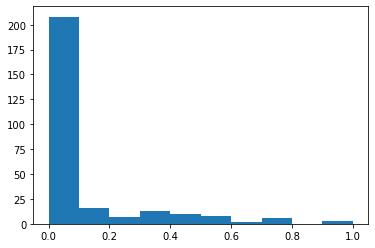

In [95]:
plt.hist(train['precipitation_form'])

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline

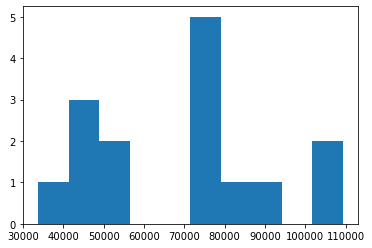

In [97]:
plt.hist(result.number_of_rentals)
plt.show()

In [98]:
result.number_of_rentals.kurt()

-0.7053118161546879

### 1-3. number_of_rentals를 예측하는 모델링을 수행하시오. submission 파일에 test 데이터의 예측값을 채워넣고 파일명을 result1으로 저장하시오.

In [99]:
test['date_time'] = pd.to_datetime(test['date_time'])

In [100]:
train.drop('wd_ss', axis = 1, inplace = True)

In [102]:
test['date_time'] = pd.to_datetime(test['date_time'])

In [103]:
test['month'] = test['date_time'].dt.month

In [104]:
train.drop('date_time', axis = 1, inplace = True)
test.drop('date_time', axis = 1, inplace = True)

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
ms = MinMaxScaler()

In [107]:
X = train.drop('number_of_rentals', axis = 1)
y = train.number_of_rentals

target = test[X.columns]

In [109]:
X.head()

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,month
0,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,4
1,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,4
2,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,4
3,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,4
4,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,4


In [110]:
target.head()

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,month
0,108.833,3.000,0.000,2.900,28.333,11.800,20.667,18.333,4
1,116.717,3.850,0.000,2.662,46.417,12.000,19.000,28.500,4
2,82.669,4.000,0.565,2.165,77.258,8.875,16.368,52.847,4
3,44.123,3.466,0.466,3.747,63.288,6.250,17.368,37.671,4
4,147.791,1.500,0.000,1.560,48.176,7.188,18.684,4.459,4


In [120]:
X.shape

(273, 9)

In [111]:
scaled_X = ms.fit_transform(X)

In [112]:
scaled_target = ms.transform(target)

In [113]:
X = pd.DataFrame(scaled_X, columns = X.columns)

In [114]:
target = pd.DataFrame(scaled_target, columns = X.columns)

In [118]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error

In [119]:
kf = KFold(n_splits = 5, random_state = 42, shuffle = True)

### Hold Out

In [137]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [138]:
svr = SVR()
dtr = DecisionTreeRegressor(random_state = 42)

In [139]:
svr.fit(X_train, y_train)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [140]:
svr_pred = svr.predict(X_val)
dtr_pred = dtr.predict(X_val)

In [141]:
svr_mae = mean_absolute_error(y_val, svr_pred)
dtr_mae = mean_absolute_error(y_val, dtr_pred)

In [142]:
svr_mae, dtr_mae

(26783.916009269604, 12411.018181818183)

In [143]:
dtr_pred = dtr.predict(target)

In [144]:
submission['number_of_rentals'] = dtr_pred

In [146]:
submission

,index,number_of_rentals
0,0,29497.0
1,1,8095.0
2,2,29375.0
3,3,26484.0
4,4,63995.0
...,...,...
86,86,67346.0
87,87,81089.0
88,88,58133.0
89,89,77056.0


In [130]:
#submission.to_csv('result1.csv', index = False)

### Ensemble

In [150]:
maes = []
r2s = []
svr_pred = np.zeros(target.shape[0])
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    svr = SVR()
    svr.fit(tr_x, tr_y)
    
    val_pred = svr.predict(val_x)
    r2 = svr.score(val_x, val_y)
    print(r2)
    val_mae = mean_absolute_error(val_y, val_pred)
    maes.append(val_mae)
    
    fold_pred = svr.predict(target) / 5
    svr_pred += fold_pred

np.mean(maes)

-0.0032674552447267136
-0.016216358993947466
-0.04353981763384862
-0.0012645417232337586
-0.019505421899865594


24140.065225841397

In [133]:
maes = []
dtr_pred = np.zeros(target.shape[0])
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    dtr = DecisionTreeRegressor(random_state = 42)
    dtr.fit(tr_x, tr_y)
    
    val_pred = dtr.predict(val_x)
    val_mae = mean_absolute_error(val_y, val_pred)
    maes.append(val_mae)
    
    fold_pred = dtr.predict(target) / 5
    dtr_pred += fold_pred

np.mean(maes)

16974.96861952862

In [134]:
final_pred = dtr_pred * 0.7 + svr_pred * 0.3

In [135]:
submission['number_of_rentals'] = final_pred

In [136]:
submission

,index,number_of_rentals
0,0,40917.015982
1,1,34493.139009
2,2,45880.443429
3,3,34623.944554
4,4,63674.167752
...,...,...
86,86,72746.600910
87,87,79751.832274
88,88,76313.579034
89,89,75131.642364


***

- linear_model : coef_
- Tree & Boosting : feature_importance_

In [155]:
from sklearn.linear_model import LinearRegression

In [156]:
lr = LinearRegression()

In [157]:
lr.fit(X_train, y_train)

LinearRegression()

In [159]:
pd.DataFrame({'features' : X_train.columns, 'importance(coef)' : lr.coef_})

,features,importance(coef)
0,wind_direction,16240.630126
1,sky_condition,27765.170167
2,precipitation_form,49842.410035
3,wind_speed,-47949.170032
4,humidity,11767.044216
5,low_temp,-31586.579930
6,high_temp,32388.000474
7,Precipitation_Probability,-126555.033665
8,month,17475.544607


In [161]:
pd.DataFrame({'features' : X_train.columns, 'importance(coef)' : dtr.feature_importances_})

,features,importance(coef)
0,wind_direction,0.081770
1,sky_condition,0.099293
2,precipitation_form,0.025361
3,wind_speed,0.409386
4,humidity,0.097673
5,low_temp,0.100978
6,high_temp,0.029038
7,Precipitation_Probability,0.092032
8,month,0.064468


***
## 2번 문제

#### 데이터 : sal_train / sal_test / sal_submission
### 2-1. 선수별 나이를 변수로 생성하고 나이와 Salary간의 상관계수를 출력하시오.

In [364]:
train = pd.read_csv('sal_train.csv')
test = pd.read_csv('sal_test.csv')
submission = pd.read_csv('sal_submission.csv')

In [365]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Salary    612 non-null    int64  
 1   Born      612 non-null    object 
 2   Nat       612 non-null    object 
 3   Ht        612 non-null    int64  
 4   Wt        612 non-null    int64  
 5   DftYr     512 non-null    float64
 6   Ovrl      512 non-null    float64
 7   Position  612 non-null    object 
 8   GP        612 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 43.2+ KB


In [366]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Born      262 non-null    object 
 1   Nat       262 non-null    object 
 2   Ht        262 non-null    int64  
 3   Wt        262 non-null    int64  
 4   DftYr     237 non-null    float64
 5   Ovrl      237 non-null    float64
 6   Position  262 non-null    object 
 7   GP        262 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 16.5+ KB


In [368]:
pd.to_datetime(test['Born'], yearfirst = True) # 꿀팁

0     1988-11-05
1     2000-02-29
2     1992-04-24
3     1999-07-05
4     1996-10-27
         ...    
257   1997-03-11
258   1995-01-30
259   1997-06-18
260   1998-09-21
261   1991-03-18
Name: Born, Length: 262, dtype: datetime64[ns]

In [340]:
train['year'] = train['Born'].str[:2]

In [341]:
train.year.max(), train.year.min()

('98', '72')

In [342]:
train['year']  = [int('19' + b) for b in train['Born'].str[:2]]

In [343]:
train['age'] = 2021 - train['year']

In [344]:
np.corrcoef(train['Salary'], train['age'])[0, 1]

0.42558301930320863

### 2-2. Ovrl가 이상치인 선수들 중에서 오른쪽 포지션(R)을 소화할 수 있는 선수들의 비율을 출력하시오.

- 결측치를 평균으로 대치하고 풀이

In [345]:
train.fillna(train.mean(), inplace = True)
test.fillna(test.mean(), inplace = True)

In [346]:
q1 = np.percentile(train['Ovrl'], 25)
q3 = np.percentile(train['Ovrl'], 75)

In [347]:
q1, q3

(19.0, 90.0)

In [348]:
### quantile -> 4분위수를 의미한다 0 ~ 1값을 갖는다.
q1 = train['Ovrl'].quantile(0.25)
q3 = train['Ovrl'].quantile(0.75)

In [349]:
q1, q3

(19.0, 90.0)

In [350]:
iqr = q3 - q1

In [351]:
l_b = q1 - 1.5 * iqr
u_b = q3 + 1.5 * iqr

In [352]:
out = train[train.Ovrl > u_b]

In [353]:
out['pos_R'] = out.Position.str.contains('R')

<ipython-input-353-3debce7669a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out['pos_R'] = out.Position.str.contains('R')


In [354]:
out.shape

(21, 12)

In [355]:
out[out.pos_R == True].shape[0]

7

In [356]:
out.shape[0]

21

In [357]:
out[out.pos_R == True].shape[0] / out.shape[0]

0.3333333333333333

### 2-3. Wt 변수에 대해 정규화를 실시하고 결과가 0.4 초과 0.6이하인 데이터의 수를 출력하시오.

In [358]:
from sklearn.preprocessing import MinMaxScaler

In [359]:
ms = MinMaxScaler()

In [360]:
train['ss_Wt'] = ms.fit_transform(train[['Wt']])

In [361]:
train[(train.ss_Wt > 0.4) & (train.ss_Wt <= 0.6)].shape[0]

245

### 2-4. Salary를 예측하는 모델링을 수행하시오. submission의 파일명은 result2로 저장하시오.

In [362]:
train = train.iloc[:, :-1]

In [363]:
def get_age(x) :
    if x[0] == '0' :
        return '20' + x
    else :
        return '19' + x

In [266]:
train['Born'] = train.Born.apply(get_age)

In [267]:
test['Born'] = test.Born.apply(get_age)

In [271]:
train['year'] = train['Born'].str[:4].astype(int)

In [273]:
train['age'] = 2021 - train['year']

In [275]:
test['year'] = test['Born'].str[:4].astype(int)

In [276]:
test['age'] = 2021 - test['year']

In [277]:
train.head()

,Salary,Born,Nat,Ht,Wt,DftYr,Ovrl,Position,GP,year,age
0,925000,1997-01-30,CAN,74,190,2015.0,18.0,D,1,1997,24
1,2250000,1993-12-21,CAN,74,207,2012.0,15.0,D,79,1993,28
2,8000000,1988-04-16,USA,72,218,2006.0,7.0,RW,65,1988,33
3,3500000,1992-01-07,CAN,77,220,2010.0,3.0,D,30,1992,29
4,1750000,1994-03-29,CAN,76,217,2012.0,16.0,RW,82,1994,27


In [278]:
test.head()

,Born,Nat,Ht,Wt,DftYr,Ovrl,Position,GP,year,age
0,1988-11-05,USA,72,216,2003.0,13.0,RW/LW,80,1988,33
1,2000-02-29,CZE,72,195,2014.0,13.0,LW,21,2000,21
2,1992-04-24,USA,75,227,2007.0,161.0,LW,81,1992,29
3,1999-07-05,FIN,72,182,2013.0,55.0,LW,73,1999,22
4,1996-10-27,USA,72,196,2011.0,36.0,D,31,1996,25


In [286]:
train['ing_time'] = train['age'] - (train['DftYr'] - train['year'])
test['ing_time'] = test['age'] - (test['DftYr'] - test['year'])

In [288]:
train.drop(['Born', 'DftYr', 'year'], axis = 1, inplace = True)
test.drop(['Born', 'DftYr', 'year'], axis = 1, inplace = True)

In [295]:
train['ava_pos'] = train.Position.str.split('/').apply(len)
test['ava_pos'] = test.Position.str.split('/').apply(len)

In [298]:
train.drop('Position', axis = 1, inplace = True)
test.drop('Position', axis = 1, inplace = True)

In [300]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [303]:
train.columns

Index(['Salary', 'Ht', 'Wt', 'Ovrl', 'GP', 'age', 'ing_time', 'ava_pos',
       'Nat_AUT', 'Nat_CAN', 'Nat_CHE', 'Nat_CZE', 'Nat_DEU', 'Nat_DNK',
       'Nat_FIN', 'Nat_FRA', 'Nat_GBR', 'Nat_HRV', 'Nat_LVA', 'Nat_NOR',
       'Nat_RUS', 'Nat_SVK', 'Nat_SWE', 'Nat_USA'],
      dtype='object')

In [304]:
test.columns

Index(['Ht', 'Wt', 'Ovrl', 'GP', 'age', 'ing_time', 'ava_pos', 'Nat_AUT',
       'Nat_CAN', 'Nat_CHE', 'Nat_CZE', 'Nat_DEU', 'Nat_DNK', 'Nat_FIN',
       'Nat_NOR', 'Nat_RUS', 'Nat_SVK', 'Nat_SVN', 'Nat_SWE', 'Nat_USA'],
      dtype='object')

In [305]:
train['Nat_SVN'] = 0

In [309]:
test[['Nat_GBR', 'Nat_FRA', 'Nat_HRV', 'Nat_LVA']] = 0

In [310]:
train.shape

(612, 25)

In [311]:
test.shape

(262, 24)

In [312]:
X = train.drop('Salary', axis = 1)
y = train.Salary

target = test[X.columns]

In [329]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [315]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [324]:
ls = Lasso()
gbr = GradientBoostingRegressor(random_state = 42)

In [325]:
ls.fit(X_train, y_train)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [328]:
ls_val = ls.predict(X_val)
gbr_val = gbr.predict(X_val)

In [330]:
ls_rmse = mean_squared_error(y_val, ls_val) ** 0.5
gbr_rmse = mean_squared_error(y_val, gbr_val) ** 0.5

In [331]:
ls_rmse, gbr_rmse

(1713842.8135534013, 1546564.0180067294)

In [332]:
ls_pred = ls.predict(target)
gbr_pred = gbr.predict(target)

In [334]:
submission.Salary = 0.6 * gbr_pred + 0.4 * ls_pred# + 0.3 * xgb_pred

In [336]:
#submission.to_csv('result1.csv', index = False)

***
## 3번 문제
#### 데이터 : carInsurance_train / carInsurance_test / carInsurance_submission

### 3-1. Balance를 정규화 한 후 상위 21위 ~ 30위의 데이터의 정규화 결과 합을 구하시오.

In [2]:
train = pd.read_csv('carInsurance_train.csv')
test = pd.read_csv('carInsurance_test.csv')
submission = pd.read_csv('carInsurance_submission.csv')

In [7]:
ms = MinMaxScaler()

In [8]:
train['ms_b'] = ms.fit_transform(train[['Balance']])

In [20]:
print(train.ms_b.sort_values(ascending = False)[20:30].sum())

2.2289233801428923


### 3-2. 50대 고객들의 연령과 Balance의 상관계수와 20대 고객들의 연령과 Balance의 상관계수의 합을 구하시오.

In [24]:
a50 = train[train.Age.isin(np.arange(50,60))]
a20 = train[train.Age.isin(np.arange(20,30))]

In [28]:
c50 = a50.corr()['Age']['Balance']
c20 = a20.corr()['Age']['Balance']

In [29]:
c20, c50

(-0.013043925372607741, 0.06109075911356098)

In [30]:
print(c50 + c20)

0.04804683374095324


### 3-3. CarInsurance를 예측하는 모델링을 수행하시오. submission에 확률 값으로 예측값을 제출하고 이 때 파일명을 result3으로 저장하시오.

#### 텍스트 데이터 결측값 처리는 최빈값으로 대치한다.

In [384]:
for col in ['Job', 'Education', 'Communication'] :
    train[col] = train[col].fillna(train[col].mode()[0])

In [386]:
for col in ['Job', 'Education', 'Communication'] :
    test[col] = test[col].fillna(test[col].mode()[0])

In [389]:
train.Marital.unique()

array(['single', 'married', 'divorced'], dtype=object)

In [390]:
test.Marital.unique()

array(['single', 'married', 'divorced'], dtype=object)

In [392]:
train.Education.unique()

array(['tertiary', 'primary', 'secondary'], dtype=object)

In [393]:
test.Education.unique()

array(['secondary', 'tertiary', 'primary'], dtype=object)

In [394]:
train.Communication.unique()

array(['telephone', 'cellular'], dtype=object)

In [395]:
test.Communication.unique()

array(['cellular', 'telephone'], dtype=object)

In [397]:
train.drop('Id', axis = 1, inplace = True)
test.drop('Id', axis = 1, inplace = True)

In [399]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [402]:
train.shape, test.shape

((4000, 41), (1000, 41))

In [403]:
X = train.drop('CarInsurance', axis = 1)
y = train.CarInsurance

target = test[X.columns]

In [404]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [405]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [408]:
knn = KNeighborsClassifier(n_neighbors = 7)
rf = RandomForestClassifier(random_state = 42, max_depth = 4, n_estimators = 200)

In [409]:
knn.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=200, random_state=42)

In [410]:
from sklearn.metrics import roc_auc_score

In [411]:
knn_pred = knn.predict_proba(X_val)[:, 1]
rf_pred = rf.predict_proba(X_val)[:, 1]

In [412]:
knn_score = roc_auc_score(y_val, knn_pred)
rf_score = roc_auc_score(y_val, rf_pred)

In [413]:
knn_score, rf_score

(0.5755858193666713, 0.7218927022158051)

In [415]:
pd.DataFrame({'features' : X.columns, 'importance' : rf.feature_importances_})

,features,importance
0,Age,0.124226
1,Default,0.000636
2,Balance,0.050164
3,HHInsurance,0.109928
4,CarLoan,0.023377
5,LastContactDay,0.029290
6,NoOfContacts,0.041471
7,DaysPassed,0.152880
8,PrevAttempts,0.133298
9,Job_admin.,0.002705


In [418]:
rf_pred = rf.predict_proba(target)[:, 1]
knn_pred = knn.predict_proba(target)[:, 1]

In [419]:
final_pred = 0.8 * rf_pred + 0.2 * knn_pred

In [420]:
submission['CarInsurance'] = final_pred

In [421]:
submission

,Id,CarInsurance
0,4001,0.339404
1,4002,0.276524
2,4003,0.294146
3,4004,0.303001
4,4005,0.283778
...,...,...
995,4996,0.368736
996,4997,0.756040
997,4998,0.427061
998,4999,0.500805


In [422]:
#submission.to_csv('result3.csv', index = False)